In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
import json

HOW to CROP Images?


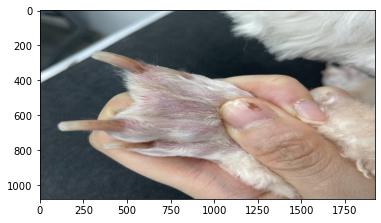

     x    y  width  height
0  974  665     55      49


In [50]:
DATADIR = "/Users/rushdamuneer/Desktop/Desktop files/Daewoong Project/petskindata/training"
CATEGORIES = ["A1_구진_플라크","A2_비듬_각질_상피성잔고리","A3_태선화_과다색소침착","A4_농포_여드름","A5_미란_궤양","A6_결절_종괴"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to each class dir in training data
    for img in os.listdir(path):
        if img.endswith(".jpg"):
            pre,ext = os.path.splitext(img)
            jsn = pre+".json"
        #    print(jsn)
            img_array = cv2.cvtColor(cv2.imread(os.path.join(path,img)),cv2.COLOR_BGR2RGB)#, cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array)
            plt.show()    
        #    break
        #if img.endswith(".json"):
            f = open(path+"/"+jsn)
            jsn_data = json.load(f)
            for meta in jsn_data['labelingInfo']:
            #    print(meta)
                jsn_df=pd.json_normalize(meta)
            #    print(jsn_df.shape)    
            f.close()
            jsn_dt=pd.json_normalize(jsn_df['box.location'])
            jsn_array=pd.json_normalize(jsn_dt[0])
            print(jsn_array)
            
            break

    break

In [51]:
print(jsn_array)
print(img_array.shape)

     x    y  width  height
0  974  665     55      49
(1080, 1920, 3)


In [52]:
x=jsn_array['x'].values[0]
y=jsn_array['y'].values[0]
w=jsn_array['width'].values[0]
h=jsn_array['height'].values[0]

In [53]:
from PIL import Image
box = (x, y, x+w, h+y)
img1 = Image.open(path+'/'+img)
img2 = img1.crop(box)
img2.show()

In [54]:
img3=img2.resize((100,100))
img3.show()

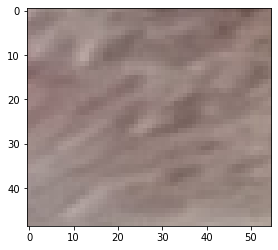

In [55]:
crop_image = img_array[y:y+h, x:x+w]
crop_image.shape
plt.imshow(crop_image)

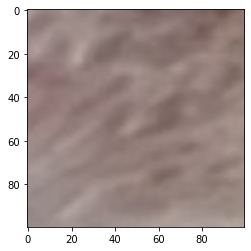

In [56]:
IMG_SIZE = 100
new_array = cv2.resize(crop_image, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)

In [57]:
new_array.shape

(100, 100, 3)

Cropping Images and Loading to pickle files (Final code starts below)

In [70]:
DATADIR = "/Users/rushdamuneer/Desktop/Desktop files/Daewoong Project/petskindata/validation"
CATEGORIES = ["A1_구진_플라크","A2_비듬_각질_상피성잔고리","A3_태선화_과다색소침착","A4_농포_여드름","A5_미란_궤양","A6_결절_종괴"]

Change the directory to dump training or testing data accordingly

In [71]:
petskin_data = []
def create_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to each class dir in training data
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            if img.endswith(".jpg"):
                try:
                    img_array = cv2.cvtColor(cv2.imread(os.path.join(path,img)),cv2.COLOR_BGR2RGB)
                    pre,ext = os.path.splitext(img)
                    jsn = pre+".json"
                    f = open(path+"/"+jsn)
                    jsn_data = json.load(f)
                    for meta in jsn_data['labelingInfo']:
                        jsn_df=pd.json_normalize(meta)
                    f.close()
                    jsn_dt=pd.json_normalize(jsn_df['box.location'])
                    jsn_array=pd.json_normalize(jsn_dt[0])
                    x_axis=jsn_array['x'].values[0]
                    y_axis=jsn_array['y'].values[0]
                    width=jsn_array['width'].values[0]
                    height=jsn_array['height'].values[0]
                    crop_image = img_array[y_axis:y_axis+height, x_axis:x_axis+width]
                    new_array = cv2.resize(crop_image, (IMG_SIZE,IMG_SIZE))
                    petskin_data.append([new_array,class_num])
                except Exception as e:
                    pass

create_data()

In [72]:
print(len(petskin_data))

6647


In [73]:
petskin_data[0]

[array([[[150, 145, 151],
         [144, 139, 144],
         [158, 153, 156],
         ...,
         [211, 205, 205],
         [179, 173, 173],
         [147, 141, 141]],
 
        [[149, 144, 150],
         [144, 139, 144],
         [158, 153, 157],
         ...,
         [198, 192, 192],
         [169, 163, 163],
         [143, 137, 137]],
 
        [[148, 143, 149],
         [145, 140, 145],
         [159, 154, 158],
         ...,
         [184, 177, 178],
         [159, 153, 153],
         [142, 136, 136]],
 
        ...,
 
        [[230, 218, 220],
         [216, 206, 207],
         [192, 184, 184],
         ...,
         [165, 146, 148],
         [162, 143, 145],
         [161, 142, 144]],
 
        [[225, 213, 215],
         [211, 200, 202],
         [187, 179, 179],
         ...,
         [173, 153, 156],
         [163, 144, 146],
         [155, 136, 138]],
 
        [[220, 208, 210],
         [207, 196, 198],
         [185, 176, 177],
         ...,
         [182, 162, 164],
  

In [74]:
import random
random.shuffle(petskin_data)

In [75]:
for sample in petskin_data[:10]:
    print(sample[0].shape,sample[1])

(100, 100, 3) 1
(100, 100, 3) 1
(100, 100, 3) 0
(100, 100, 3) 2
(100, 100, 3) 5
(100, 100, 3) 4
(100, 100, 3) 0
(100, 100, 3) 5
(100, 100, 3) 0
(100, 100, 3) 3


In [76]:
X = []
y = []

In [77]:
for features, label in petskin_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [78]:
X.shape

(6647, 100, 100, 3)

Change file name for test and train pickle files

In [79]:
import pickle

pickle_out = open("X_test_cropped.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y_test_cropped.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [80]:
pickle_in = open("X_test_cropped.pickle","rb")
X=pickle.load(pickle_in)

In [81]:
X[1]

array([[[165, 149, 150],
        [162, 147, 147],
        [160, 144, 145],
        ...,
        [170, 154, 155],
        [176, 160, 161],
        [175, 159, 160]],

       [[166, 151, 152],
        [165, 148, 150],
        [164, 148, 149],
        ...,
        [173, 157, 158],
        [176, 159, 160],
        [174, 158, 159]],

       [[167, 151, 152],
        [167, 151, 152],
        [168, 152, 153],
        ...,
        [175, 159, 160],
        [175, 159, 160],
        [173, 157, 158]],

       ...,

       [[178, 167, 171],
        [178, 167, 171],
        [176, 166, 170],
        ...,
        [181, 167, 167],
        [182, 168, 168],
        [181, 167, 167]],

       [[182, 172, 175],
        [182, 171, 175],
        [180, 170, 174],
        ...,
        [181, 167, 167],
        [179, 165, 165],
        [178, 164, 164]],

       [[183, 174, 177],
        [182, 173, 176],
        [181, 171, 174],
        ...,
        [181, 167, 167],
        [178, 165, 165],
        [177, 163, 163]]